###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2023.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 14.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [1]:
import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/Obrada informacija/Lab4")

prices = pd.read_csv('prices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


Mounted at /content/drive


,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,231.492233,48.000053,33.417080,47.497765,21.776472,59.029892,78.483353,95.259102,44.591763,44.784126,...,46.068901,69.980576,97.039024,48.517841,101.234894,63.253788,121.330002,14.56,8.545244,78.800003
2019-01-03,225.968170,47.684727,32.893154,47.227894,21.286907,56.050797,76.889748,93.196533,44.335598,44.775520,...,44.762505,70.253906,97.081886,48.517841,101.271584,63.285011,122.430000,14.75,8.607411,79.599998
2019-01-04,233.537125,49.129986,33.932262,48.828522,21.994057,58.534962,79.183434,96.280815,45.280781,45.438545,...,46.522518,70.042305,97.021873,48.473194,101.299133,64.347198,121.440002,14.73,8.731748,81.440002
2019-01-07,235.378525,49.366474,34.002121,48.949490,22.021255,59.058445,79.487411,98.457954,45.218948,45.128563,...,46.685822,69.936508,97.030441,48.357071,101.299133,64.971985,121.860001,14.67,8.799566,82.320000
2019-01-08,237.589920,49.716839,34.194221,49.182148,22.039383,59.553371,80.104607,99.546509,45.634129,45.688255,...,47.175724,69.848312,97.244827,48.321350,101.289948,65.393723,121.529999,14.69,8.873038,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


anualni srednji povrati:  SPY     0.162342
IEFA    0.091193
VWO     0.060619
EWJ     0.073052
XLF     0.139975
XLK     0.272858
XLV     0.124275
XLY     0.153950
XLP     0.108482
XLU     0.097755
XLI     0.152630
XLE     0.184252
XLC     0.142875
XLRE    0.108111
XLB     0.148092
BND     0.007868
LQD     0.026661
BNDX    0.006089
SHV     0.017299
HYG     0.042089
GLD     0.095262
SLV     0.118609
PDBC    0.113647
USO     0.062010
dtype: float64
anualna srednja volatilnost:  SPY     0.210693
IEFA    0.198465
VWO     0.213897
EWJ     0.180945
XLF     0.266037
XLK     0.274792
XLV     0.186838
XLY     0.255546
XLP     0.170537
XLU     0.228380
XLI     0.235427
XLE     0.366367
XLC     0.245188
XLRE    0.246439
XLB     0.242833
BND     0.067426
LQD     0.109315
BNDX    0.048493
SHV     0.002879
HYG     0.105702
GLD     0.149494
SLV     0.300700
PDBC    0.199155
USO     0.444197
dtype: float64


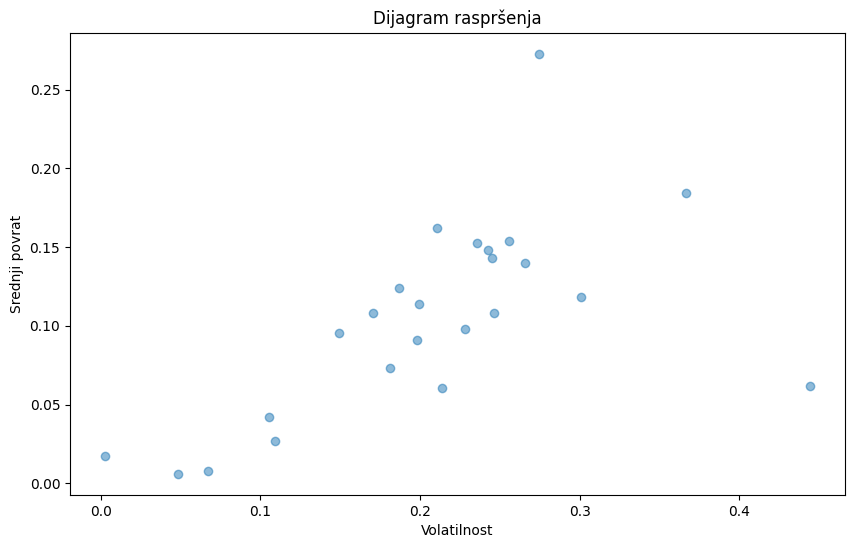


Ističu se 2 koja imaju dobar povrat onaj gore i onaj skroz lijevo - ovaj gore je dobra investicija, te se ističe jedan desno sa jako lošim povratom - loša investicija


In [14]:
#Vaš kod ide ovdje
import matplotlib.pyplot as plt

dnevni_povrat = prices.pct_change().dropna()
srednji_povrat = dnevni_povrat.mean() * 252
srednja_volatilnost = dnevni_povrat.std() * (252 ** 0.5)
print("anualni srednji povrati: ", srednji_povrat)
print("anualna srednja volatilnost: ", srednja_volatilnost)
plt.figure(figsize=(10, 6))
plt.scatter(srednja_volatilnost, srednji_povrat, alpha=0.5)
plt.title('Dijagram raspršenja')
plt.xlabel('Volatilnost')
plt.ylabel('Srednji povrat')
plt.show()

print("\nIstiču se 2 koja imaju dobar povrat onaj gore i onaj skroz lijevo - ovaj gore je dobra investicija, te se ističe jedan desno sa jako lošim povratom - loša investicija")

1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

In [15]:
matrica_kovarijance = dnevni_povrat.cov()
matrica_korelacije = dnevni_povrat.corr()
print("matrica kovarijance: ", matrica_kovarijance)
print("matrica korelacije: " , matrica_korelacije)



matrica kovarijance:                 SPY          IEFA           VWO           EWJ           XLF  \
SPY   1.761574e-04  1.457528e-04  1.376812e-04  1.170823e-04  1.918401e-04   
IEFA  1.457528e-04  1.563030e-04  1.409613e-04  1.259424e-04  1.728926e-04   
VWO   1.376812e-04  1.409613e-04  1.815550e-04  1.112717e-04  1.534720e-04   
EWJ   1.170823e-04  1.259424e-04  1.112717e-04  1.299253e-04  1.357587e-04   
XLF   1.918401e-04  1.728926e-04  1.534720e-04  1.357587e-04  2.808551e-04   
XLK   2.158161e-04  1.701803e-04  1.706754e-04  1.387625e-04  2.036297e-04   
XLV   1.318726e-04  1.061152e-04  9.604616e-05  8.357183e-05  1.406268e-04   
XLY   1.934884e-04  1.614538e-04  1.574461e-04  1.310982e-04  1.994529e-04   
XLP   1.107683e-04  8.944329e-05  7.605146e-05  7.151245e-05  1.225315e-04   
XLU   1.274866e-04  1.049761e-04  8.575088e-05  8.290778e-05  1.461856e-04   
XLI   1.753387e-04  1.551730e-04  1.373171e-04  1.224394e-04  2.245905e-04   
XLE   1.907531e-04  1.835906e-04  1.738178

# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.**



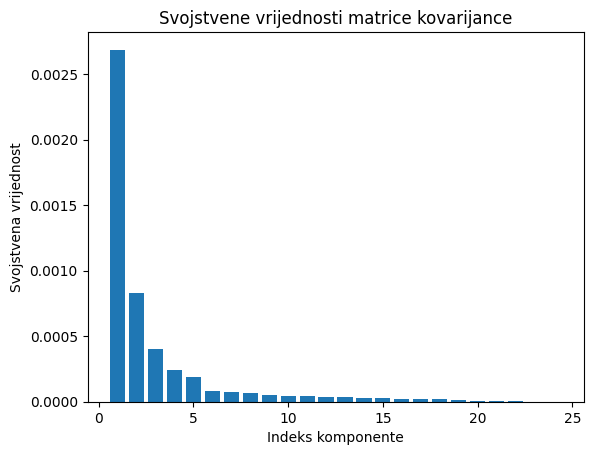

In [16]:
#Vaš kod ide ovdje
import numpy as np


svojstvene_vrijednosti, svojstveni_vektori = np.linalg.eig(matrica_kovarijance)

indeksi_sortirano = np.argsort(svojstvene_vrijednosti)[::-1]
svojstvene_vrijednosti_sortirano = svojstvene_vrijednosti[indeksi_sortirano]
svojstveni_vektori_sortirano = svojstveni_vektori[:, indeksi_sortirano]

plt.bar(range(1, len(svojstvene_vrijednosti) + 1), svojstvene_vrijednosti_sortirano)
plt.title('Svojstvene vrijednosti matrice kovarijance')
plt.xlabel('Indeks komponente')
plt.ylabel('Svojstvena vrijednost')
plt.show()

2.2. **Izračunajte koliki udio varijance objašnjavaju prve tri komponente?**

In [18]:
ukupna_varijanca = np.sum(svojstvene_vrijednosti)

udio_varijance_prve_tri = np.sum(svojstvene_vrijednosti_sortirano[:3]) / ukupna_varijanca

print(f"Udio varijance prve tri komponente: {udio_varijance_prve_tri * 100:.2f}%")



Udio varijance prve tri komponente: 79.71%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

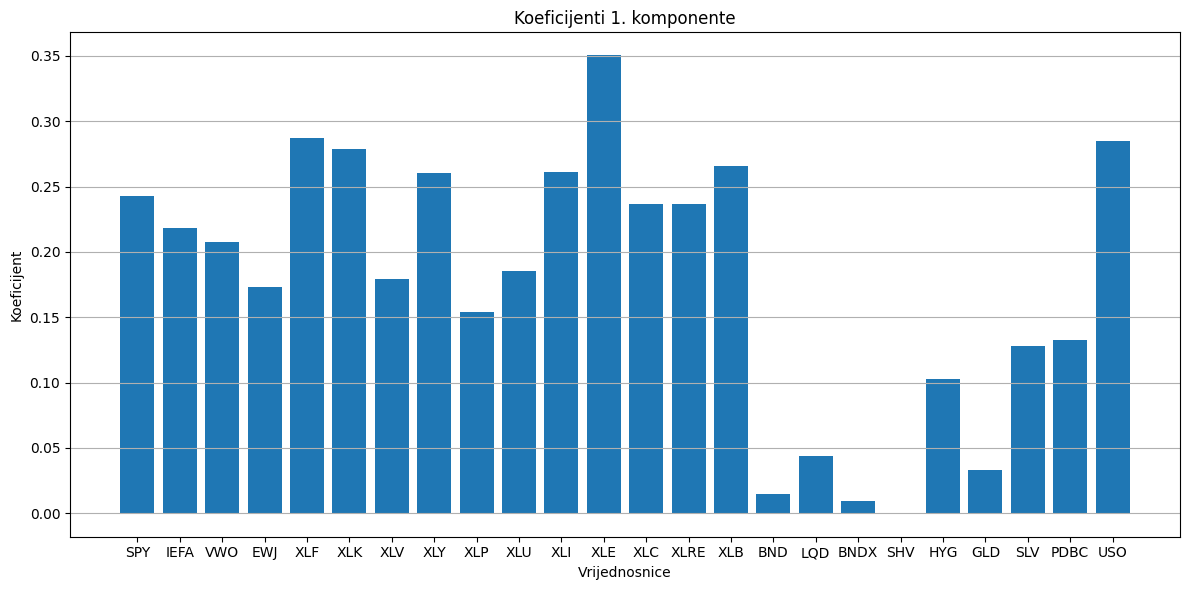

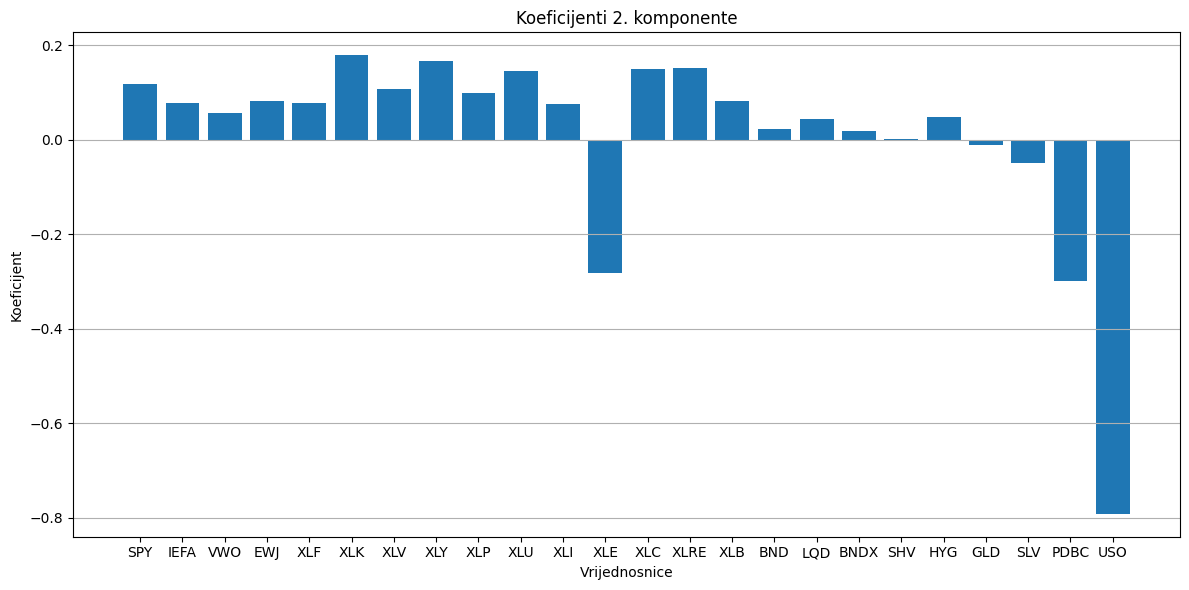

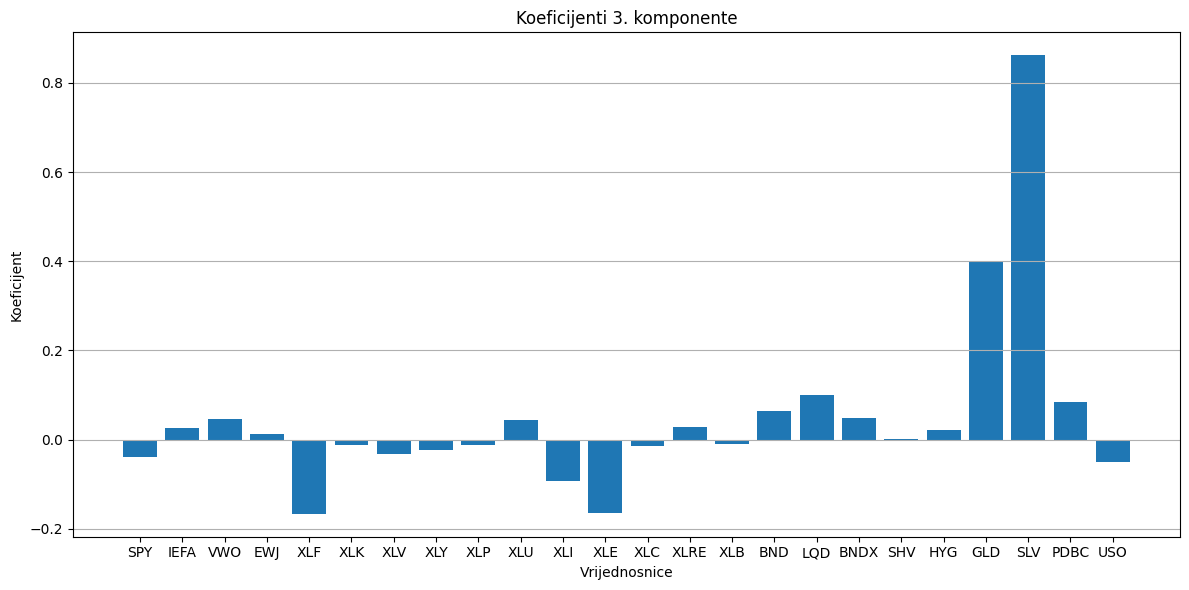

In [45]:
prve_tri_svojstvene_komponente = svojstveni_vektori_sortirano[:, :3]
etf_names = prices.columns[:].tolist()

for i in range(3):
    plt.figure(figsize=(12,6 ))
    plt.bar(etf_names, prve_tri_svojstvene_komponente[:, i])
    plt.title(f'Koeficijenti {i+1}. komponente')
    plt.xlabel('Vrijednosnice')
    plt.ylabel('Koeficijent')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

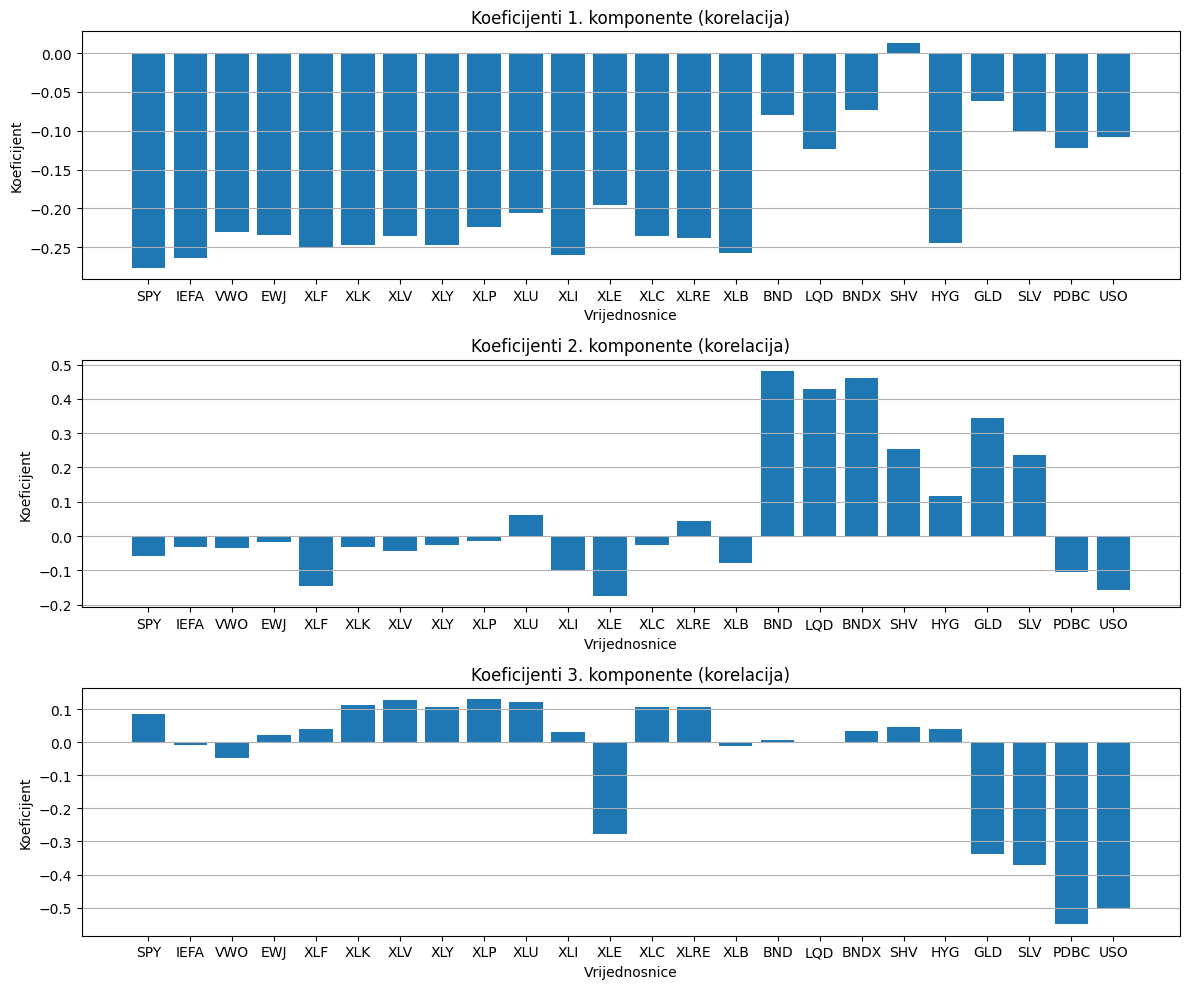


Udio varijance prve tri komponente - kovarijanca: 0.7971142095323
Udio varijance prve tri komponente - korelacija: 0.71860375988872


In [41]:
%matplotlib inline
matrica_korelacije = dnevni_povrat.corr()
svojstvene_vrijednosti_corr, svojstveni_vektori_corr = np.linalg.eig(matrica_korelacije)

indeksi_sortirano_corr = np.argsort(svojstvene_vrijednosti_corr)[::-1]
svojstvene_vrijednosti_sortirano_corr = svojstvene_vrijednosti_corr[indeksi_sortirano_corr]
svojstveni_vektori_sortirano_corr = svojstveni_vektori_corr[:, indeksi_sortirano_corr]

ukupna_varijanca_corr = np.sum(svojstvene_vrijednosti_corr)
udio_varijance_prve_tri_corr = np.sum(svojstvene_vrijednosti_sortirano_corr[:3]) / ukupna_varijanca_corr

prve_tri_svojstvene_komponente_corr = svojstveni_vektori_sortirano_corr[:, :3]


plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.bar(etf_names, prve_tri_svojstvene_komponente_corr[:, i])
    plt.title(f'Koeficijenti {i+1}. komponente (korelacija)')
    plt.xlabel('Vrijednosnice')
    plt.ylabel('Koeficijent')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()




In [42]:
print()
print(f"Udio varijance prve tri komponente - kovarijanca: {udio_varijance_prve_tri}")
print(f"Udio varijance prve tri komponente - korelacija: {udio_varijance_prve_tri_corr}")



Udio varijance prve tri komponente - kovarijanca: 0.7971142095323
Udio varijance prve tri komponente - korelacija: 0.71860375988872


# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100).**



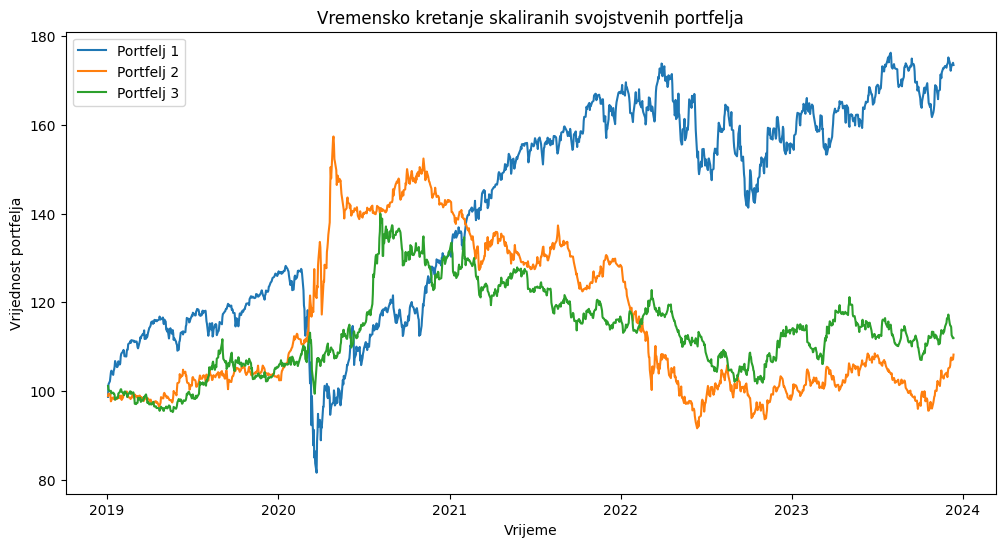

In [46]:
skalirani_svojstveni_portfelji = prve_tri_svojstvene_komponente / np.sum(np.abs(prve_tri_svojstvene_komponente), axis=0)

povratna_vrijednost_portfelja = dnevni_povrat @ skalirani_svojstveni_portfelji

cijene_portfelja = (1 + povratna_vrijednost_portfelja).cumprod() * 100

plt.figure(figsize=(12, 6))
plt.plot(cijene_portfelja)
plt.title('Vremensko kretanje skaliranih svojstvenih portfelja')
plt.xlabel('Vrijeme')
plt.ylabel('Vrijednost portfelja')
plt.legend([f'Portfelj {i+1}' for i in range(3)])
plt.show()


Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?